In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 

In [2]:
df_stocks    = pd.read_csv( 'Historical_monthly_return_data.csv')

In [3]:
df_stocks.head()

,Date,S&P 500,MSFT,WBA,TSLA
0,01-12-10,"1257,640","23,976","34,563","26,630"
1,03-01-11,"1286,120","23,822","35,876","24,100"
2,01-02-11,"1327,220","22,969","38,608","23,890"
3,01-03-11,"1325,830","21,940","35,757","27,750"
4,01-04-11,"1363,610","22,398","38,055","27,600"


In [4]:
#df_stocks['year'] = 
stock_date = pd.to_datetime(df_stocks.Date,format='%d-%m-%y')

In [5]:
df_stocks['year']=stock_date.dt.year
df_stocks['month']=stock_date.dt.month
df_stocks['S&P 500']=df_stocks['S&P 500'].astype(str).str.replace(',','.')
df_stocks['S&P 500']=df_stocks['S&P 500'].astype(float)
df_stocks['MSFT']=df_stocks['MSFT'].astype(str).str.replace(',','.')
df_stocks['MSFT']=df_stocks['MSFT'].astype(float)
df_stocks['WBA']=df_stocks['WBA'].astype(str).str.replace(',','.')
df_stocks['WBA']=df_stocks['WBA'].astype(float)
df_stocks['TSLA']=df_stocks['TSLA'].astype(str).str.replace(',','.')
df_stocks['TSLA']=df_stocks['TSLA'].astype(float)

In [6]:
df_stocks

,Date,S&P 500,MSFT,WBA,TSLA,year,month
0,01-12-10,1257.64,23.976,34.563,26.63,2010,12
1,03-01-11,1286.12,23.822,35.876,24.10,2011,1
2,01-02-11,1327.22,22.969,38.608,23.89,2011,2
3,01-03-11,1325.83,21.940,35.757,27.75,2011,3
4,01-04-11,1363.61,22.398,38.055,27.60,2011,4
5,02-05-11,1345.20,21.754,39.020,30.14,2011,5
6,01-06-11,1320.64,22.615,37.974,29.13,2011,6
7,01-07-11,1292.28,23.833,34.915,28.17,2011,7
8,01-08-11,1218.89,23.283,31.681,24.74,2011,8
9,01-09-11,1131.42,21.786,29.594,24.39,2011,9


In [7]:
(df_stocks['S&P 500']/df_stocks['S&P 500'].shift(1)-1).head()

0         NaN
1    0.022646
2    0.031957
3   -0.001047
4    0.028495
Name: S&P 500, dtype: float64

In [8]:
print (1286.12/1257.64-1)

0.02264559015298473


In [9]:
df_stocks_ret = df_stocks.ix[:,1:5]/df_stocks.ix[:,1:5].shift(1)-1
df_stocks_ret.ix[0,:] = 0
df_stocks_ret['Date']= df_stocks['Date']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [10]:
df_stocks_ret

,S&P 500,MSFT,WBA,TSLA,Date
0,0.000000,0.000000,0.000000,0.000000,01-12-10
1,0.022646,-0.006423,0.037989,-0.095006,03-01-11
2,0.031957,-0.035807,0.076151,-0.008714,01-02-11
3,-0.001047,-0.044800,-0.073845,0.161574,01-03-11
4,0.028495,0.020875,0.064267,-0.005405,01-04-11
5,-0.013501,-0.028753,0.025358,0.092029,02-05-11
6,-0.018258,0.039579,-0.026807,-0.033510,01-06-11
7,-0.021474,0.053858,-0.080555,-0.032956,01-07-11
8,-0.056791,-0.023077,-0.092625,-0.121761,01-08-11
9,-0.071762,-0.064296,-0.065875,-0.014147,01-09-11


In [12]:
df_stocks_ret.columns = ['SP_RET','MSFT_RET','WBA_RET','TSLA_RET','Date']

In [13]:
df_stocks_ret.head()

,SP_RET,MSFT_RET,WBA_RET,TSLA_RET,Date
0,0.000000,0.000000,0.000000,0.000000,01-12-10
1,0.022646,-0.006423,0.037989,-0.095006,03-01-11
2,0.031957,-0.035807,0.076151,-0.008714,01-02-11
3,-0.001047,-0.044800,-0.073845,0.161574,01-03-11
4,0.028495,0.020875,0.064267,-0.005405,01-04-11


In [14]:
df_res = pd.concat([df_stocks, df_stocks_ret], axis=1)

In [15]:
df_res.head()

,Date,S&P 500,MSFT,WBA,TSLA,year,month,SP_RET,MSFT_RET,WBA_RET,TSLA_RET,Date
0,01-12-10,1257.64,23.976,34.563,26.63,2010,12,0.000000,0.000000,0.000000,0.000000,01-12-10
1,03-01-11,1286.12,23.822,35.876,24.10,2011,1,0.022646,-0.006423,0.037989,-0.095006,03-01-11
2,01-02-11,1327.22,22.969,38.608,23.89,2011,2,0.031957,-0.035807,0.076151,-0.008714,01-02-11
3,01-03-11,1325.83,21.940,35.757,27.75,2011,3,-0.001047,-0.044800,-0.073845,0.161574,01-03-11
4,01-04-11,1363.61,22.398,38.055,27.60,2011,4,0.028495,0.020875,0.064267,-0.005405,01-04-11


In [16]:
#Average annual return
print ('sp: %.3f' % (100*(df_res.SP_RET.sum()/(len(df_res.SP_RET)-1))))
print ('MSFT_RET: %.3f' % (100*(df_res.MSFT_RET.sum()/(len(df_res.MSFT_RET)-1))))
print ('WBA_RET: %.3f' % (100*(df_res.WBA_RET.sum()/(len(df_res.WBA_RET)-1))))
print ('TSLA_RET: %.3f' % (100*(df_res.TSLA_RET.sum()/(len(df_res.TSLA_RET)-1))))
#Annualized Average annual return
print ('ann sp: %.3f' % (100*12*(df_res.SP_RET.sum()/(len(df_res.SP_RET)-1)) ))
print ('ann MSFT_RET: %.3f' % (100*12*(df_res.MSFT_RET.sum()/(len(df_res.MSFT_RET)-1)) ))
print ('ann WBA_RET: %.3f' % (100*12*(df_res.WBA_RET.sum()/(len(df_res.WBA_RET)-1)) ))
print ('ann TSLA_RET: %.3f' % (100*12*(df_res.TSLA_RET.sum()/(len(df_res.TSLA_RET)-1)) ))
ann_avg_ret_array = np.array([np.round((100*12*(df_res.SP_RET.sum()/(len(df_res.SP_RET)-1)) ),3),
                             np.round((100*12*(df_res.MSFT_RET.sum()/(len(df_res.MSFT_RET)-1)) ),3),
                             np.round((100*12*(df_res.WBA_RET.sum()/(len(df_res.WBA_RET)-1)) ),3),
                             np.round((100*12*(df_res.TSLA_RET.sum()/(len(df_res.TSLA_RET)-1)) ),3)])
print (ann_avg_ret_array)

sp: 0.868
MSFT_RET: 1.573
WBA_RET: 1.763
TSLA_RET: 4.877
ann sp: 10.421
ann MSFT_RET: 18.874
ann WBA_RET: 21.161
ann TSLA_RET: 58.520
[ 10.421  18.874  21.161  58.52 ]


In [17]:
#Average annual volatility
print ('sp: %.3f' % (100*(df_res.SP_RET[1:].std())) )
print ('MSFT_RET: %.3f' % (100*(df_res.MSFT_RET[1:].std())))
print ('WBA_RET: %.3f' % (100*(df_res.WBA_RET[1:].std())))
print ('TSLA_RET: %.3f' % (100*(df_res.TSLA_RET[1:].std())))
#Annualized Average annual volatility
print ('ann sp: %.3f' % (100*(np.sqrt(12)*(df_res.SP_RET[1:].std()) )) )
print ('ann MSFT_RET: %.3f' % (100*(np.sqrt(12)*(df_res.MSFT_RET[1:].std()) )) )
print ('ann WBA_RET: %.3f' % (100*(np.sqrt(12)*(df_res.WBA_RET[1:].std()) )) )
print ('ann TSLA_RET: %.3f' % (100*(np.sqrt(12)*(df_res.TSLA_RET[1:].std())) ) )
ann_vol_array = np.array([round((100*(np.sqrt(12)*(df_res.SP_RET[1:].std()) )),3),
                          round((100*(np.sqrt(12)*(df_res.MSFT_RET[1:].std()) )),3),
                          round((100*(np.sqrt(12)*(df_res.WBA_RET[1:].std()) )),3) ,
                                round((100*(np.sqrt(12)*(df_res.TSLA_RET[1:].std())) ),3)])
print (ann_vol_array)

sp: 3.377
MSFT_RET: 6.302
WBA_RET: 7.481
TSLA_RET: 16.632
ann sp: 11.698
ann MSFT_RET: 21.831
ann WBA_RET: 25.914
ann TSLA_RET: 57.613
[ 11.698  21.831  25.914  57.613]


In [18]:
from scipy import stats
ret_arr = np.array([0.2,0.06,0.01])
print ('mean: ' + str( stats.mstats.gmean(ret_arr+1)-1))

print ('sp: %.3f' % (100*( stats.mstats.gmean(df_res.SP_RET[1:]+1)-1)) )
print ('MSFT_RET: %.3f' % (100*( stats.mstats.gmean(df_res.MSFT_RET[1:]+1)-1)) )
print ('WBA_RET: %.3f' % (100*( stats.mstats.gmean(df_res.WBA_RET[1:]+1)-1)) )
print ('TSLA_RET: %.3f' % (100*( stats.mstats.gmean(df_res.TSLA_RET[1:]+1)-1)) )

print ('ann sp: %.3f' % (100*( np.power(1+(stats.mstats.gmean(df_res.SP_RET[1:]+1)-1),12 )-1 ) ) )
print ('ann MSFT_RET: %.3f' % (100*( np.power(1+( stats.mstats.gmean(df_res.MSFT_RET[1:]+1)-1),12 )-1 ) ) )
print ('ann WBA_RET: %.3f' % (100*( np.power(1+( stats.mstats.gmean(df_res.WBA_RET[1:]+1)-1),12 )-1 ) ) )
print ('ann TSLA_RET: %.3f' % (100*( np.power(1+( stats.mstats.gmean(df_res.TSLA_RET[1:]+1)-1),12 )-1 ) ) )

mean: 0.0870999982199
sp: 0.813
MSFT_RET: 1.384
WBA_RET: 1.499
TSLA_RET: 3.732
ann sp: 10.200
ann MSFT_RET: 17.936
ann WBA_RET: 19.542
ann TSLA_RET: 55.229


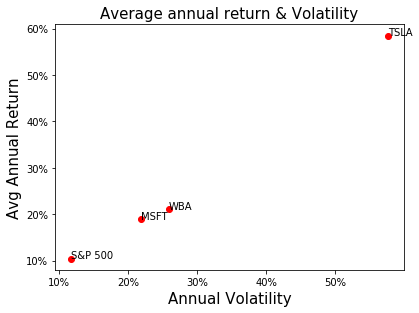

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

labels = np.array(['S&P 500', 'MSFT', 'WBA', 'TSLA'])
fig, ax = plt.subplots()
plt.tight_layout()
fig.subplots_adjust(left=0.15)
ax.set_title('Average annual return & Volatility', fontsize=15)
ax.set_xlabel('Annual Volatility', fontsize=15)
ax.set_ylabel('Avg Annual Return' , fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
pointObjects = ax.plot(ann_vol_array,ann_avg_ret_array , 'ro')

for x,y,label in zip(ann_vol_array,ann_avg_ret_array,labels):
    ax.annotate(label, xy=(x, y))
plt.show()
fig.savefig('cg-risk-wk1-peer.pdf')
plt.close(fig)

In [34]:
df_stocks_ret_4_cov = df_stocks_ret.iloc[1:,1:4]

In [35]:
df_stocks_ret_4_cov

,MSFT_RET,WBA_RET,TSLA_RET
1,-0.006423,0.037989,-0.095006
2,-0.035807,0.076151,-0.008714
3,-0.044800,-0.073845,0.161574
4,0.020875,0.064267,-0.005405
5,-0.028753,0.025358,0.092029
6,0.039579,-0.026807,-0.033510
7,0.053858,-0.080555,-0.032956
8,-0.023077,-0.092625,-0.121761
9,-0.064296,-0.065875,-0.014147
10,0.069907,0.009428,0.204182


In [38]:
corr_matrix = np.cov(df_stocks_ret_4_cov)

In [43]:
corr_matrix.shape

(60, 60)

In [40]:
ann_avg_ret = np.array([np.round((100*12*(df_res.MSFT_RET.sum()/(len(df_res.MSFT_RET)-1)) ),3),
                             np.round((100*12*(df_res.WBA_RET.sum()/(len(df_res.WBA_RET)-1)) ),3),
                             np.round((100*12*(df_res.TSLA_RET.sum()/(len(df_res.TSLA_RET)-1)) ),3)])

In [42]:
ann_avg_ret

array([ 18.874,  21.161,  58.52 ])